In [19]:
from tqsdk.api import TqApi
import numpy as np

In [20]:
c_long = 80  # call期权买入价
p_short = 60  # put期权卖出价
strike = 3150  # 执行价为3150

def call_long_profit(f_price, c_price, strike_price):  # 做多认购期权的收益与期货价格的关系
    if f_price <= strike_price:
        y = -c_price
    else:
        y = f_price - strike_price - c_price    
    return y

def put_short_profit(f_price, p_price, strike_price):   # 做空认沽期权的收益与期货价格的关系
    if f_price <= strike_price:
        y = f_price - strike_price + p_price  
    else:
        y = p_price    
    return y

price = np.array(range(2500, 4000))
call_long_y = np.array([call_long_profit(f_p, c_long, strike) for f_p in price])  # 做多一手认购
put_short_y = np.array([put_short_profit(f_p, p_short, strike) for f_p in price])  # 做空一手认沽
    

- 同时做多一手认购和做空一手认沽，相当于构造出一个买入价为执行价 + 认购买入价 - 认沽卖出价的期货-在上例中相当于{{strike + (c_long - p_short)}}

In [21]:
current_price = 3175  # 假设期货现价为3175
future_short_y = np.array([current_price - f_p for f_p in price])  # 此时再做空一手期货，整个组合相当于在3170买入， 3175卖出

In [22]:
profit = future_short_y + call_long_y + put_short_y

#### 在不计算手续费成本的情况下， 当期货现价大于{{strike + (c_long - p_short)}}，做多该组合可以套利，相反如果现价小于{{strike + (c_long - p_short)}}，则做空该组合可以套利

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


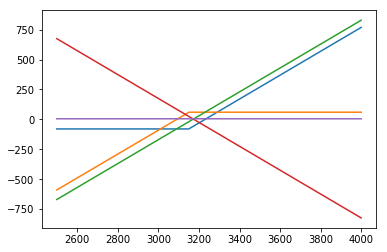

In [24]:
plot(price, call_long_y)
plot(price, put_short_y)
plot(price, call_long_y + put_short_y)  # 两手期权合起来相当于做多了一手期货
plot(price, future_short_y)  # 3175做空一手期货与期货价格的盈亏关系
plot(price, profit) # 稳定套利的价差

In [25]:
profit  # （不计算成本）稳定获利5个点

array([5, 5, 5, ..., 5, 5, 5])

In [26]:
api = TqApi('120324')

In [27]:
m1901_P_3150 = api.get_kline_serial('DCE.m1901-P-3150', 60)
m1901_C_3150 = api.get_kline_serial('DCE.m1901-P-3150', 60)
m1901_F = api.get_kline_serial('DCE.m1901', 60)

In [28]:
dp3150 = api.get_kline_serial('USER.dp3150', 60, 200)

In [29]:
dp3150.to_dataframe()

,datetime,open,high,low,close,volume,open_oi,close_oi
0,1542807600000000000,3149.0,3150.0,3149.0,3150.0,1472,1218038,1218116
1,1542807660000000000,3150.0,3150.0,3150.0,3150.0,174,1218116,1218184
2,1542807720000000000,3150.0,3150.0,3150.0,3150.0,164,1218184,1218188
3,1542807780000000000,3150.0,3150.0,3148.0,3148.0,840,1218188,1218288
4,1542807840000000000,3148.0,3149.0,3148.0,3149.0,284,1218288,1218264
5,1542807900000000000,3149.0,3149.0,3148.0,3148.0,318,1218264,1218190
6,1542807960000000000,3148.0,3148.5,3148.0,3148.5,696,1218190,1218296
7,1542808020000000000,3148.5,3148.5,3148.5,3148.5,146,1218296,1218302
8,1542808080000000000,3148.5,3148.5,3148.5,3148.5,416,1218302,1218330
9,1542808140000000000,3148.5,3148.5,3148.5,3148.5,280,1218330,1218364


- dp3150是构造后的组合， 系数是豆粕期货1， 认购期权1， 认沽期权-1，系数为正是做多，负为做空。做多一份dp3150可以得到一份期货做空合约以及到期在3150买入一份期货的权利

In [30]:
dp3150[-1]

{'_listener': set(),
 '_path': ['klines', 'USER.dp3150', '60000000000', 'data', '68708'],
 'close': nan,
 'close_oi': 0,
 'datetime': 0,
 'high': nan,
 'low': nan,
 'open': nan,
 'open_oi': 0,
 'volume': 0}